## Importing packages that are needed in the program

In [2]:
import numpy as np # numpy is for vector and mathematics operations
import matplotlib.pyplot as plt # matplotlib is for plotting
from sklearn.datasets import make_regression # scikitlearn is for machine learning related tools

# In this Jupyter Notebook, we demonstrate how to find gradient through normal equation and gradient descent

## First, we create data set.

In [3]:
# Create data set.
n = 100 # The number of data sets
X = 2 * np.random.rand(n, 1) # Generate n x 1 random variable according to uniform distribution (0,1)
y = 4 + 3 * X + np.random.randn(n, 1) # Plot y added by Gaussian noise with mean 0 and variance 1 

## Then, we plot the data sets

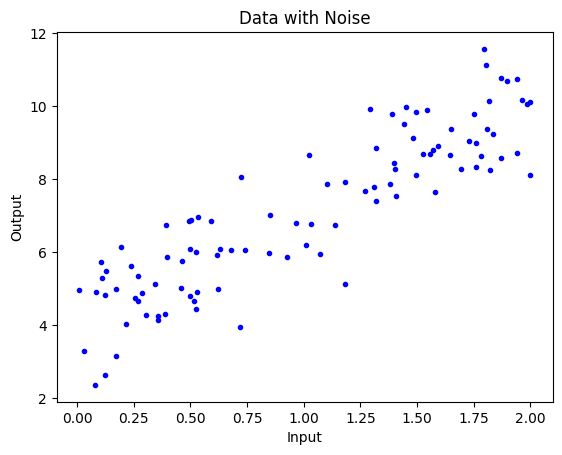

In [4]:
# Plot the generated data set.
plt.plot(X,y,'b.') # Plot X and Y
plt.xlabel("Input") # Give label X-axis
plt.ylabel("Output") # Give label Y-axis
plt.title('Data with Noise') # Give title
plt.show() # show the plot

# Normal Equation 

## We calculate the $\theta$ parameter

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # set x_0 = 1 according to the linear regression. Then, the matrix dimension of X_b is n x 2. np.c_ is a concantenate function from numpy, which combines two vectors.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Find \theta value using normal equation
print("Theta is: ", theta_best)

Theta is:  [[4.05697924]
 [3.01865572]]


## Prediction

In [6]:
X_new = np.array([[0], [2]]) # generate a vector sample that has 0 and 2 elements
X_new_b = np.c_[np.ones((2, 1)), X_new] # set x_0 = 1 according to the linear regression. Then, the matrix dimension of X_b is 2 x 2 
y_predict = X_new_b.dot(theta_best) # y = X.\theta_{best}. We want to see the prediction.
print("Y prediction is: ", y_predict) 

Y prediction is:  [[ 4.05697924]
 [10.09429068]]


## Plotting the data set and its prediction

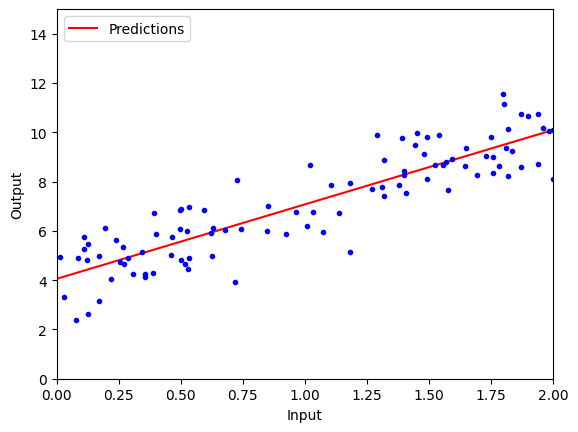

In [7]:
plt.plot(X_new, y_predict, "r-", label = "Predictions") # red line is from the linear regression
plt.plot(X, y, "b.")
plt.legend(loc="upper left")
plt.xlabel("Input")
plt.ylabel("Output")
plt.axis([0, 2, 0, 15])
plt.show()

# Gradient Descent

## Initialization

In [8]:
alpha = 0.1 # learning rate
n_iterations = 1000 # the number of iterations
theta = np.random.randn(2,1) # random initialization for \theta.

## Gradient Descent Iteration

In [9]:
for iteration in range(n_iterations): # iteration loop with duration n_iterations
  gradients = 2/n * X_b.T.dot(X_b.dot(theta) - y) # computing gradients
  # gradients = 2/n * (theta.T.dot(X_b.T)- y.T).dot(X_b) # alternative gradients calculation  
  theta = theta - alpha * gradients # update the gradient's value

In [10]:
theta

array([[4.05697924],
       [3.01865572]])

# Stochastic Gradient Descent (SGD)

## Initialization

In [11]:
n_epochs = 50 # the number of epochs
t0, t1 = 5, 50 # learning schedule hyperparameters
theta = np.random.randn(2,1) # random initialization for \theta
# n_sample = 5

## Defining the *learning schedule* function

In [12]:
# learning schedule function
def learning_schedule(t):
    return t0 / (t + t1)

## SGD Iteration

In [13]:
for epoch in range(n_epochs):
  for i in range(n):
    random_index = np.random.randint(n) # generate random integer number from 0 to 99. This is done to select one of the indexes in input and output samples, which have 100 samples. Remember, in python, index is subtracted by one.  
    xi = X_b[random_index:random_index+1] #take one sample of x at index 'random_index'
    yi = y[random_index:random_index+1] # take one sample of y at index 'random_index'
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # calculate the gradient's value
    eta = learning_schedule(epoch * n+ i) # update learning rate
    theta = theta - eta * gradients # update the gradient's value

In [14]:
theta

array([[3.96415772],
       [3.00342939]])

# Mini-Batch Gradient Descent

## Initialize Parameter

In [15]:
n_iter = 10 # the number of iterations 
batch_size = 30 # batch size 

## Mini-Batch Gradient Descent Iteration

In [16]:
for it in range(n_iter): # loop iterations
    indices = np.random.permutation(n) # generate index by random permutation
    X_mb = X[indices] # take samples from X whose indexes are variable 'indices'
    y_mb = y[indices] # take samples from y whose indexes are variable 'indices'
    for i in range(0,n,batch_size):
        X_i = X_mb[i:i+batch_size] # take samples with the size batch_size of X_mb at index i
        y_i = y_mb[i:i+batch_size] # take samples with the size batch_size of y_mb at index i
        length_X_i = len(X_i)
        X_i = np.c_[np.ones(len(X_i)),X_i] # make a matrix with dimension length_X_i x 2          
        prediction = np.dot(X_i,theta) # make prediction
        theta = theta -(1/batch_size)*alpha*( X_i.T.dot((prediction - y_i))) # update gradient's value
        # cost += cal_cost(theta,X_i,y_i)
        # cost_history[it]  = cost

In [17]:
theta

array([[4.02884921],
       [3.03641115]])